# A code example: The long memory property of order flow

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def binning(x,y,nbin=10,eq = True):
    step = (np.max(x)-np.min(x))/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [5]:
def PreProcessing(t,price):
    T = np.zeros(len(t))
    Price = np.zeros(len(t))
    prev = t[0]
    n = 0
    for i in range(len(t)):
        n += (prev != t[i])
        T[n] = t[i]
        Price[n] = price[i]
        prev = t[i]
        pass
    return T[:n+1],Price[:n+1]

In [4]:
INTC_LOB   = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]=="k"])
TSLA_LOB   = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]=="k"])
INTC_order = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]!="k"])
TSLA_order = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]!="k"])

In [9]:
#TSLAPrice = []
for i,z in zip(TSLA_order,TSLA_LOB):
    data = pd.read_csv(i,header=None)[[0]]
    lob = pd.read_csv(z,header=None)[[0,2]]
    data[1] = (lob[0]+lob[2])/2
    a,b=PreProcessing(data[0].values,data[1].values)
    break
    #TSLASize.extend(data.tolist().copy())
    pass


In [18]:
def AggPriceChange(p):
    result = np.zeros(len(p))
    prev = p[0]
    n = 0
    for i in p:
        n += (prev!=i)
        result[n] = i
        pass
    return result[:n+1]

In [19]:
r = AggPriceChange(b)


In [21]:
import statsmodels.tsa.api as ts

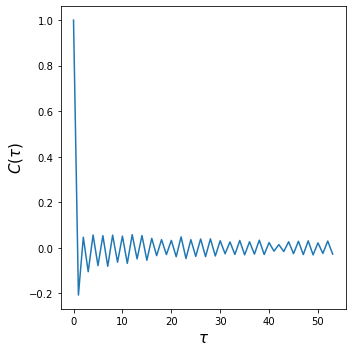

In [25]:
fig,(ax1) = plt.subplots(1,1,figsize=(5,5),tight_layout=True)
ax1.plot(ts.acf(np.diff(r)))

#ax1.set_title("TSLA",fontsize=15)
ax1.set_xlabel(r"$\tau$",fontsize=15)
ax1.set_ylabel(r"$C(\tau)$",fontsize=15)
plt.savefig("BidAskBounce.png")
plt.savefig("../../../docs/CodeExample/StylizedFacts/BidAskBounce.png")
